# start

In [9]:
! export GLBACKEND="pytorch"
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import axes
from matplotlib.font_manager import FontProperties
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import glob
import dgl
import torch 
from dgl.nn import GraphConv
from script.utils3 import Get_DGL
from torch.utils.data import Dataset
import time
import pandas as pd
from pandas import DataFrame
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
import warnings 

Using backend: pytorch[11:06:08] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: /root/anaconda3/lib/python3.8/site-packages/dgl/tensoradapter/pytorch/libtensoradapter_pytorch_1.11.0.so: cannot open shared object file: No such file or directory



In [8]:
data_file = '../data1/data1.csv'
mol_dir = '../data1/data1_sdf_files/'

In [10]:
tmp_df = pd.read_csv(data_file)
lig_smiles = tmp_df['Ligand'].to_list()
add_smiles = tmp_df['Additive'].to_list()
base_smiles = tmp_df['Base'].to_list()
ar_ha_smiles = tmp_df['Aryl halide'].to_list()
labels_ori = tmp_df['Output'].to_list()

lig_smi_set = list(set(lig_smiles))
add_smi_set = list(set(add_smiles))
base_smi_set = list(set(base_smiles))
ar_ha_smi_set = list(set(ar_ha_smiles))
labels_ori=np.array(labels_ori)
label_std = (np.array(labels_ori)-np.min(labels_ori))/(np.max(labels_ori)-np.min(labels_ori))

In [11]:
def sort_func(x): return eval(x.split('/')[-1].split('.')[0].split('_')[-1])
lig_files = sorted(glob.glob(mol_dir+'lig_*.sdf'),key=sort_func)
add_files = sorted(glob.glob(mol_dir+'add_*.sdf'),key=sort_func)
base_files = sorted(glob.glob(mol_dir+'base_*.sdf'),key=sort_func)
ar_ha_files = sorted(glob.glob(mol_dir+'ar_ha_*.sdf'),key=sort_func)

In [5]:
sdf_file=lig_files+add_files+base_files+ar_ha_files
with open(mol_dir+'smiles_file_dict.csv','r') as fr:
    lines = fr.readlines()
smiles_name_dict = {tmp_line.strip().split(',')[0]:tmp_line.strip().split(',')[1] for tmp_line in lines}

In [6]:
lig_file_graph_dict = {}
all_desc_max = []
all_desc_min = []
for tmp_file in lig_files:
    tmp_file_name = tmp_file.split('/')[-1].split('.')[0]
    tmp_g = Get_DGL(tmp_file)
    lig_file_graph_dict[tmp_file_name] = tmp_g
    tmp_desc_max = np.array(tmp_g.ndata['feat']).max(axis=0)
    
    tmp_desc_min = np.array(tmp_g.ndata['feat']).min(axis=0)
    all_desc_max.append(tmp_desc_max)
    all_desc_min.append(tmp_desc_min)
    print(tmp_file_name)
all_desc_max = np.array(all_desc_max)
all_desc_min = np.array(all_desc_min)
desc_max = all_desc_max.max(axis=0)
desc_min = all_desc_min.min(axis=0)
for key in lig_file_graph_dict:
    lig_file_graph_dict[key].ndata['feat_std'] = (lig_file_graph_dict[key].ndata['feat'] - torch.tensor(desc_min))/(torch.tensor(desc_max) - torch.tensor(desc_min))


lig_0
lig_1
lig_2
lig_3


In [7]:
add_file_graph_dict = {}
all_desc_max = []
all_desc_min = []
for tmp_file in add_files:
    tmp_file_name = tmp_file.split('/')[-1].split('.')[0]
    tmp_g = Get_DGL(tmp_file)
    add_file_graph_dict[tmp_file_name] = tmp_g
    tmp_desc_max = np.array(tmp_g.ndata['feat']).max(axis=0)
    tmp_desc_min = np.array(tmp_g.ndata['feat']).min(axis=0)
    all_desc_max.append(tmp_desc_max)
    all_desc_min.append(tmp_desc_min)
    print(tmp_file_name)
all_desc_max = np.array(all_desc_max)
all_desc_min = np.array(all_desc_min)
desc_max = all_desc_max.max(axis=0)
desc_min = all_desc_min.min(axis=0)
for key in add_file_graph_dict:
    add_file_graph_dict[key].ndata['feat_std'] = (add_file_graph_dict[key].ndata['feat'] - torch.tensor(desc_min))/(torch.tensor(desc_max) - torch.tensor(desc_min))


add_0
add_1
add_2
add_3
add_4
add_5
add_6
add_7
add_8
add_9
add_10
add_11
add_12
add_13
add_14
add_15
add_16
add_17
add_18
add_19
add_20
add_21


In [8]:
base_file_graph_dict = {}
all_desc_max = []
all_desc_min = []
for tmp_file in base_files:
    tmp_file_name = tmp_file.split('/')[-1].split('.')[0]
    tmp_g = Get_DGL(tmp_file)
    base_file_graph_dict[tmp_file_name] = tmp_g
    tmp_desc_max = np.array(tmp_g.ndata['feat']).max(axis=0)
    tmp_desc_min = np.array(tmp_g.ndata['feat']).min(axis=0)
    all_desc_max.append(tmp_desc_max)
    all_desc_min.append(tmp_desc_min)
    print(tmp_file_name)
all_desc_max = np.array(all_desc_max)
all_desc_min = np.array(all_desc_min)
desc_max = all_desc_max.max(axis=0)
desc_min = all_desc_min.min(axis=0)
for key in base_file_graph_dict:
    base_file_graph_dict[key].ndata['feat_std'] = (base_file_graph_dict[key].ndata['feat'] - torch.tensor(desc_min))/(torch.tensor(desc_max) - torch.tensor(desc_min))


base_0
base_1
base_2


In [9]:
ar_ha_file_graph_dict = {}
all_desc_max = []
all_desc_min = []
for tmp_file in ar_ha_files:
    tmp_file_name = tmp_file.split('/')[-1].split('.')[0]
    tmp_g = Get_DGL(tmp_file)
    ar_ha_file_graph_dict[tmp_file_name] = tmp_g
    tmp_desc_max = np.array(tmp_g.ndata['feat']).max(axis=0)
    tmp_desc_min = np.array(tmp_g.ndata['feat']).min(axis=0)
    all_desc_max.append(tmp_desc_max)
    all_desc_min.append(tmp_desc_min)
    print(tmp_file_name)
all_desc_max = np.array(all_desc_max)
all_desc_min = np.array(all_desc_min)
desc_max = all_desc_max.max(axis=0)
desc_min = all_desc_min.min(axis=0)
for key in ar_ha_file_graph_dict:
    ar_ha_file_graph_dict[key].ndata['feat_std'] = (ar_ha_file_graph_dict[key].ndata['feat'] - torch.tensor(desc_min))/(torch.tensor(desc_max) - torch.tensor(desc_min))


ar_ha_0
ar_ha_1
ar_ha_2
ar_ha_3
ar_ha_4
ar_ha_5
ar_ha_6
ar_ha_7
ar_ha_8
ar_ha_9
ar_ha_10
ar_ha_11
ar_ha_12
ar_ha_13
ar_ha_14


In [10]:
class Graph_DataSet(Dataset):

    def __init__(self, root, train=True, transform = None, target_transform=None):
        super(Graph_DataSet, self).__init__()
        self.train = train
        self.transform = transform
        self.target_transform = target_transform

        #如果是训练则加载训练集，如果是测试则加载测试集
        if self.train :
            file_annotation = root + '/data1.csv' 
            sdf_folder = root + '/data1_sdf_files/'
        else:
            file_annotation = root + '/test.csv' 
            sdf_folder = root + '/test_sdf/'
        df = pd.read_csv(file_annotation)
 
        #data_dict = df[['molecule','CV']]
        target = np.array(df['Output'].to_list())
        self.target_min = target.min()
        self.target_range = target.max() - target.min()
        
        target_std = (target - target.min())/(target.max()-target.min())
        
        lig_smi = df['Ligand'].to_list()
        add_smi = df['Additive'].to_list()
        base_smi = df['Base'].to_list()
        ar_ha_smi = df['Aryl halide'].to_list()
        
        lig_file_names = [smiles_name_dict[tmp_smi] for tmp_smi in lig_smi]
        add_file_names = [smiles_name_dict[tmp_smi] for tmp_smi in add_smi]
        base_file_names = [smiles_name_dict[tmp_smi] for tmp_smi in base_smi]
        ar_ha_file_names = [smiles_name_dict[tmp_smi] for tmp_smi in ar_ha_smi]
        
        self.lig_file_names = lig_file_names
        self.add_file_names = add_file_names
        self.base_file_names = base_file_names
        self.ar_ha_file_names = ar_ha_file_names
        
        self.target_std = target_std
        self.sdf_folder = sdf_folder
            
    def __getitem__(self, index):
        #mol_name = self.filenames[index]
        lig_name = self.lig_file_names[index]
        add_name = self.add_file_names[index]
        base_name = self.base_file_names[index]
        ar_ha_name = self.ar_ha_file_names[index]
        label = self.target_std[index]

        graph_1 = lig_file_graph_dict[lig_name]
        graph_2 = add_file_graph_dict[add_name]
        graph_3 = base_file_graph_dict[base_name]
        graph_4 = ar_ha_file_graph_dict[ar_ha_name]
        return [graph_1,graph_1.ndata['feat'],graph_2,graph_2.ndata['feat'],graph_3,graph_3.ndata['feat'],graph_4,graph_4.ndata['feat']], label

    def __len__(self):
        return len(self.target_std)

# train

In [11]:
loss = 'mse'
batch_size = 128
shuffle = np.array(list(range(3955)))
np.random.shuffle(shuffle)
train_index = shuffle[:2769]
val_index = shuffle[2769:]
dataset = Graph_DataSet('../data1')
train_data=[]
for i in train_index:
    tem_data=dataset[i]
    train_data.append(tem_data)
    
val_data=[]
for i in val_index:
    tem_data=dataset[i]
    val_data.append(tem_data)     

## GraphConv

In [12]:
class StochasticTwoLayerGCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()      
        
        #self.conv1 = dgl.nn.SGConv(in_features, hidden_features,  k=2, cached=True)
        #self.conv2 = dgl.nn.SGConv(hidden_features, hidden_features, k=2, cached=True)
        #self.conv3 = dgl.nn.SGConv(hidden_features, hidden_features, k=2, cached=True)
        
        #self.conv1 = dgl.nn.SAGEConv(in_features, hidden_features, 'pool')
        #self.conv2 = dgl.nn.SAGEConv(hidden_features, hidden_features, 'pool')
        #self.conv3 = dgl.nn.SAGEConv(hidden_features, hidden_features, 'pool')
                
        #self.conv1 = dgl.nn.EdgeConv(in_features, hidden_features)
        #self.conv2 = dgl.nn.EdgeConv(hidden_features, hidden_features)
        #self.conv3 = dgl.nn.EdgeConv(hidden_features, hidden_features)
        
        #self.conv1 = dgl.nn.GATConv(in_features, hidden_features, num_heads=3)
        #self.conv2 = dgl.nn.GATConv(hidden_features, hidden_features, num_heads=3)
        #self.conv3 = dgl.nn.GATConv(hidden_features, hidden_features, num_heads=3)
        
        #self.conv1 = dgl.nn.TAGConv(in_features, hidden_features, k=4)
        #self.conv2 = dgl.nn.TAGConv(hidden_features, hidden_features, k=4)
        #self.conv3 = dgl.nn.TAGConv(hidden_features, hidden_features, k=4)
        
        #self.conv1 = dgl.nn.RelGraphConv(in_features, hidden_features, 4, num_bases=4)
        #self.conv2 = dgl.nn.RelGraphConv(hidden_features, hidden_features,4 , num_bases=4)
        #self.conv3 = dgl.nn.RelGraphConv(hidden_features, hidden_features,4, num_bases=4)
        #etype = np.ones(186).astype(np.int64)
        
        self.conv1 = dgl.nn.GraphConv(in_features, hidden_features)
        self.conv2 = dgl.nn.GraphConv(hidden_features, hidden_features)
        #self.conv3 = dgl.nn.GraphConv(hidden_features, hidden_features)
       
        self.fc1   = nn.Linear(304,128) 
        self.fc2   = nn.Linear(128, 64)
        self.fc3   = nn.Linear(64, 1)

    def forward(self,g1,x1,g2,x2,g3,x3,g4,x4,multi_graph_opt='mean',output_opt='mean'):
        
        x1 = F.relu(self.conv1(g1, x1))
        x1 = F.relu(self.conv2(g1, x1))
        #x1 = F.relu(self.conv3(g1, x1))
        #x1=torch.mean(x1,axis=0).reshape(-1,1)
        #x1t=x1.transpose(-1,0)
        #x1t=x1.reshape(-1,200)
       
        x2 = F.relu(self.conv1(g2, x2))
        x2 = F.relu(self.conv2(g2, x2))
        #x2 = F.relu(self.conv3(g2, x2))
        #x2=torch.mean(x2,axis=0).reshape(-1,1)
        #x2t=x2.transpose(-1,0)
        #x2t=x2.reshape(-1,200)
        
        x3 = F.relu(self.conv1(g3, x3))
        x3 = F.relu(self.conv2(g3, x3))
        #x3 = F.relu(self.conv3(g3, x3))
        #x3=torch.mean(x3,axis=0).reshape(-1,1)
        #x3t=x3.transpose(-1,0)
        #x3t=x3.reshape(-1,200)
        x4 = F.relu(self.conv1(g4, x4))
        
        if multi_graph_opt == 'mean':
            x = torch.mean(torch.cat([x1,x2,x3,x4],axis=0),axis=0)
           
        elif multi_graph_opt == 'sum':
            x = torch.sum(torch.cat([x1,x2,x3,x4],axis=0),axis=0)
        
        if output_opt == 'mean':
            x = F.torch.mean(x)
        elif output_opt == 'sum':
            x = F.torch.sum(x)
        '''x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))'''
        
        return x

### random

In [13]:
import tensorflow as tf
model = StochasticTwoLayerGCN(543,256,1)
#optimizer = optim.Adam(model.parameters())
#loss_func = torch.nn.L1Loss()
optimizer = optim.Adam(model.parameters())
loss_func = torch.nn.L1Loss()

all_test=[]
all_pred=[]

for epoch in range(50):
    get_output=[]
    all_loss = []
    model.train()
    for i, data in enumerate(train_data):
        inputs, labels = data

        # zero the parameter gradients
        

        # forward + backward + optimize
        outputs = model(inputs[0],inputs[1],
                        inputs[2],inputs[3],
                        inputs[4],inputs[5],
                        inputs[6],inputs[7],)
        get_output.append(outputs)

        labels = torch.tensor(labels) 
        
        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        all_loss.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(epoch,'Train MAE',np.mean(all_loss))
    model.eval()
    test_get_output=[]
    test_all_labels = []
    all_loss = []
    for data in val_data:
        inputs, labels = data
        outputs = model(inputs[0],inputs[1],
                        inputs[2],inputs[3],
                        inputs[4],inputs[5],
                        inputs[6],inputs[7],)
        test_get_output.append(outputs)
        labels = torch.tensor(labels) 
        test_all_labels.append(labels)
        loss = loss_func(outputs, labels)
        all_loss.append(loss.detach().numpy())
    all_test.append(test_all_labels)
    all_pred.append(test_get_output)
    print(epoch,'Test MAE',np.mean(all_loss))   

#hist = model.fit_generator(train_data,validation_data=val_data,epochs=100,callbacks=[checkpoint])

0 Train MAE 0.21270385
0 Test MAE 0.1960435
1 Train MAE 0.1865789
1 Test MAE 0.17935874
2 Train MAE 0.17381625
2 Test MAE 0.17524856
3 Train MAE 0.16801815
3 Test MAE 0.17161943
4 Train MAE 0.16242586
4 Test MAE 0.16442461
5 Train MAE 0.1585712
5 Test MAE 0.16374446
6 Train MAE 0.15528987
6 Test MAE 0.16558705
7 Train MAE 0.15292025
7 Test MAE 0.16095378
8 Train MAE 0.15154807
8 Test MAE 0.16139065
9 Train MAE 0.14977425
9 Test MAE 0.15861818
10 Train MAE 0.14913723
10 Test MAE 0.15718277
11 Train MAE 0.14780985
11 Test MAE 0.15567176
12 Train MAE 0.14754978
12 Test MAE 0.15626281
13 Train MAE 0.1469684
13 Test MAE 0.15560588
14 Train MAE 0.145989
14 Test MAE 0.15268147
15 Train MAE 0.14564468
15 Test MAE 0.15196747
16 Train MAE 0.14504836
16 Test MAE 0.15110868
17 Train MAE 0.14459988
17 Test MAE 0.15047312
18 Train MAE 0.14430049
18 Test MAE 0.15125741
19 Train MAE 0.14388351
19 Test MAE 0.15069889
20 Train MAE 0.14351036
20 Test MAE 0.14992565
21 Train MAE 0.1435999
21 Test MAE 0.15

In [42]:
tem=[]
for i in all_pred:
    for j in i:
        tem.append(j.item())

In [49]:
tem=np.array(tem).reshape(50,-1)

In [48]:
np.save('./dataset/data1_SEMG_GCN_all_test',all_test)
np.save('./dataset/data1_SEMG_GCN_all_pred',np.array(tem).reshape(50,-1))

In [24]:
all_test=np.load('./dataset/data1_SEMG_GCN_all_test.npy')
tem=np.load('./dataset/data1_SEMG_GCN_all_pred.npy')

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
all_rmse=[]
all_r2=[]
all_test_=[]
all_pred_=[]
for m in list(range(40,50)):
    y_val=np.array(all_test[m])*(labels_ori.max()-labels_ori.min())+labels_ori.min()
    y_pred=np.array(tem[m])*(labels_ori.max()-labels_ori.min())+labels_ori.min()  
    rmse=np.round((mean_squared_error(y_val,y_pred))**(0.5),3)
    r2=np.round(r2_score(y_val,y_pred),3)
    all_rmse.append(rmse)
    all_r2.append(r2)
    print(rmse,r2)

18.334 0.563
18.555 0.552
18.331 0.563
18.651 0.548
18.374 0.561
18.423 0.559
18.474 0.556
18.304 0.564
18.355 0.562
18.286 0.565


In [30]:
np.array(all_rmse)-18.409

array([-0.075,  0.146, -0.078,  0.242, -0.035,  0.014,  0.065, -0.105,
       -0.054, -0.123])

In [22]:
np.mean(all_rmse),np.mean(all_r2)

(18.408699999999996, 0.5593)

In [14]:
test_all_labels_=[]
for i in all_test[42]:
    test_all_labels_.append(i.tolist())
    
test_get_output_=[]
for i in all_pred[42]:
    test_get_output_.append(i.tolist())

In [15]:
test_all_labels_=[]
for i in test_all_labels:
    test_all_labels_.append(i.tolist())
    
test_get_output_=[]
for i in test_get_output:
    test_get_output_.append(i.tolist())

NameError: name 'test_all_labels' is not defined

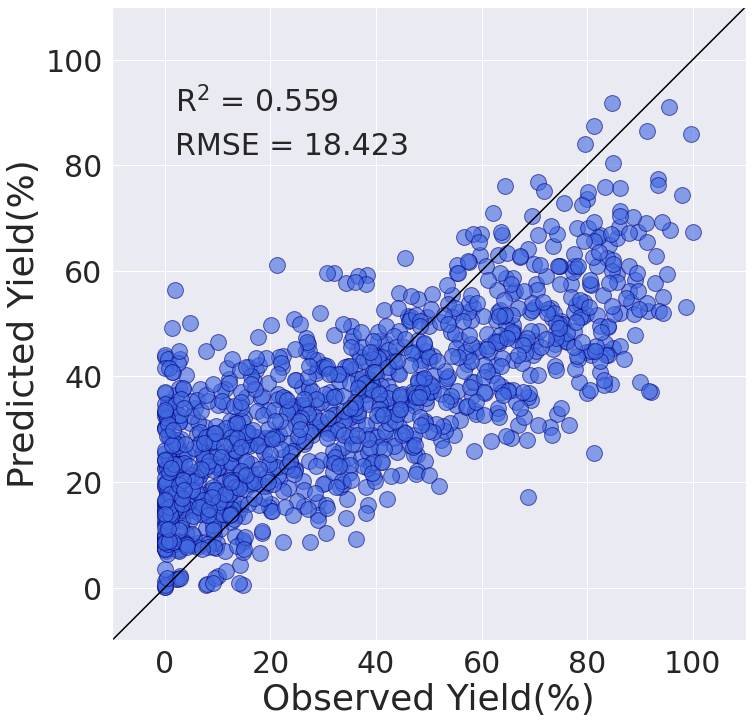

In [31]:
number=45
y_val=np.array(all_test[number])*(labels_ori.max()-labels_ori.min())+labels_ori.min()
y_pred=np.array(tem[number])*(labels_ori.max()-labels_ori.min())+labels_ori.min()
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
sns.set(style='darkgrid')


import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',    # 图表区的背景色
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-10,110],[-10,110],c='black')
plt.xlim(-10,110)
plt.ylim(-10,110)
x_major_locator=MultipleLocator(20)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
#ax.set_facecolor('oldlace')#oldlace   mistyrose
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#plt.title('doyle',fontsize=14)
plt.xlabel("Observed Yield(%)",fontsize=36)
plt.ylabel("Predicted Yield(%)",fontsize=36)
#plt.grid(c='white', linewidth=2)
plt.tick_params(labelsize=30)
plt.text(2,82,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(2,90,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
#plt.text(-0.5,3.4,'Test Set R2: %.3f'%r2_score(y_val,y_pred),fontsize=24)

plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1)
plt.show()

In [31]:
np.save('../run_data/doyle_se_gcn_random_y_val.npy',y_val)
np.save('../run_data/doyle_se_gcn_random_y_val_pred.npy',y_pred)